<a href="https://colab.research.google.com/github/kraptor512/Basic_MCQ_Project-/blob/main/sketch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK-1(Normal Image to Pencil Sketch Using OpenCV)**


Saving WhatsApp Image 2025-10-22 at 17.22.11_366ebc35.jpg to WhatsApp Image 2025-10-22 at 17.22.11_366ebc35 (9).jpg


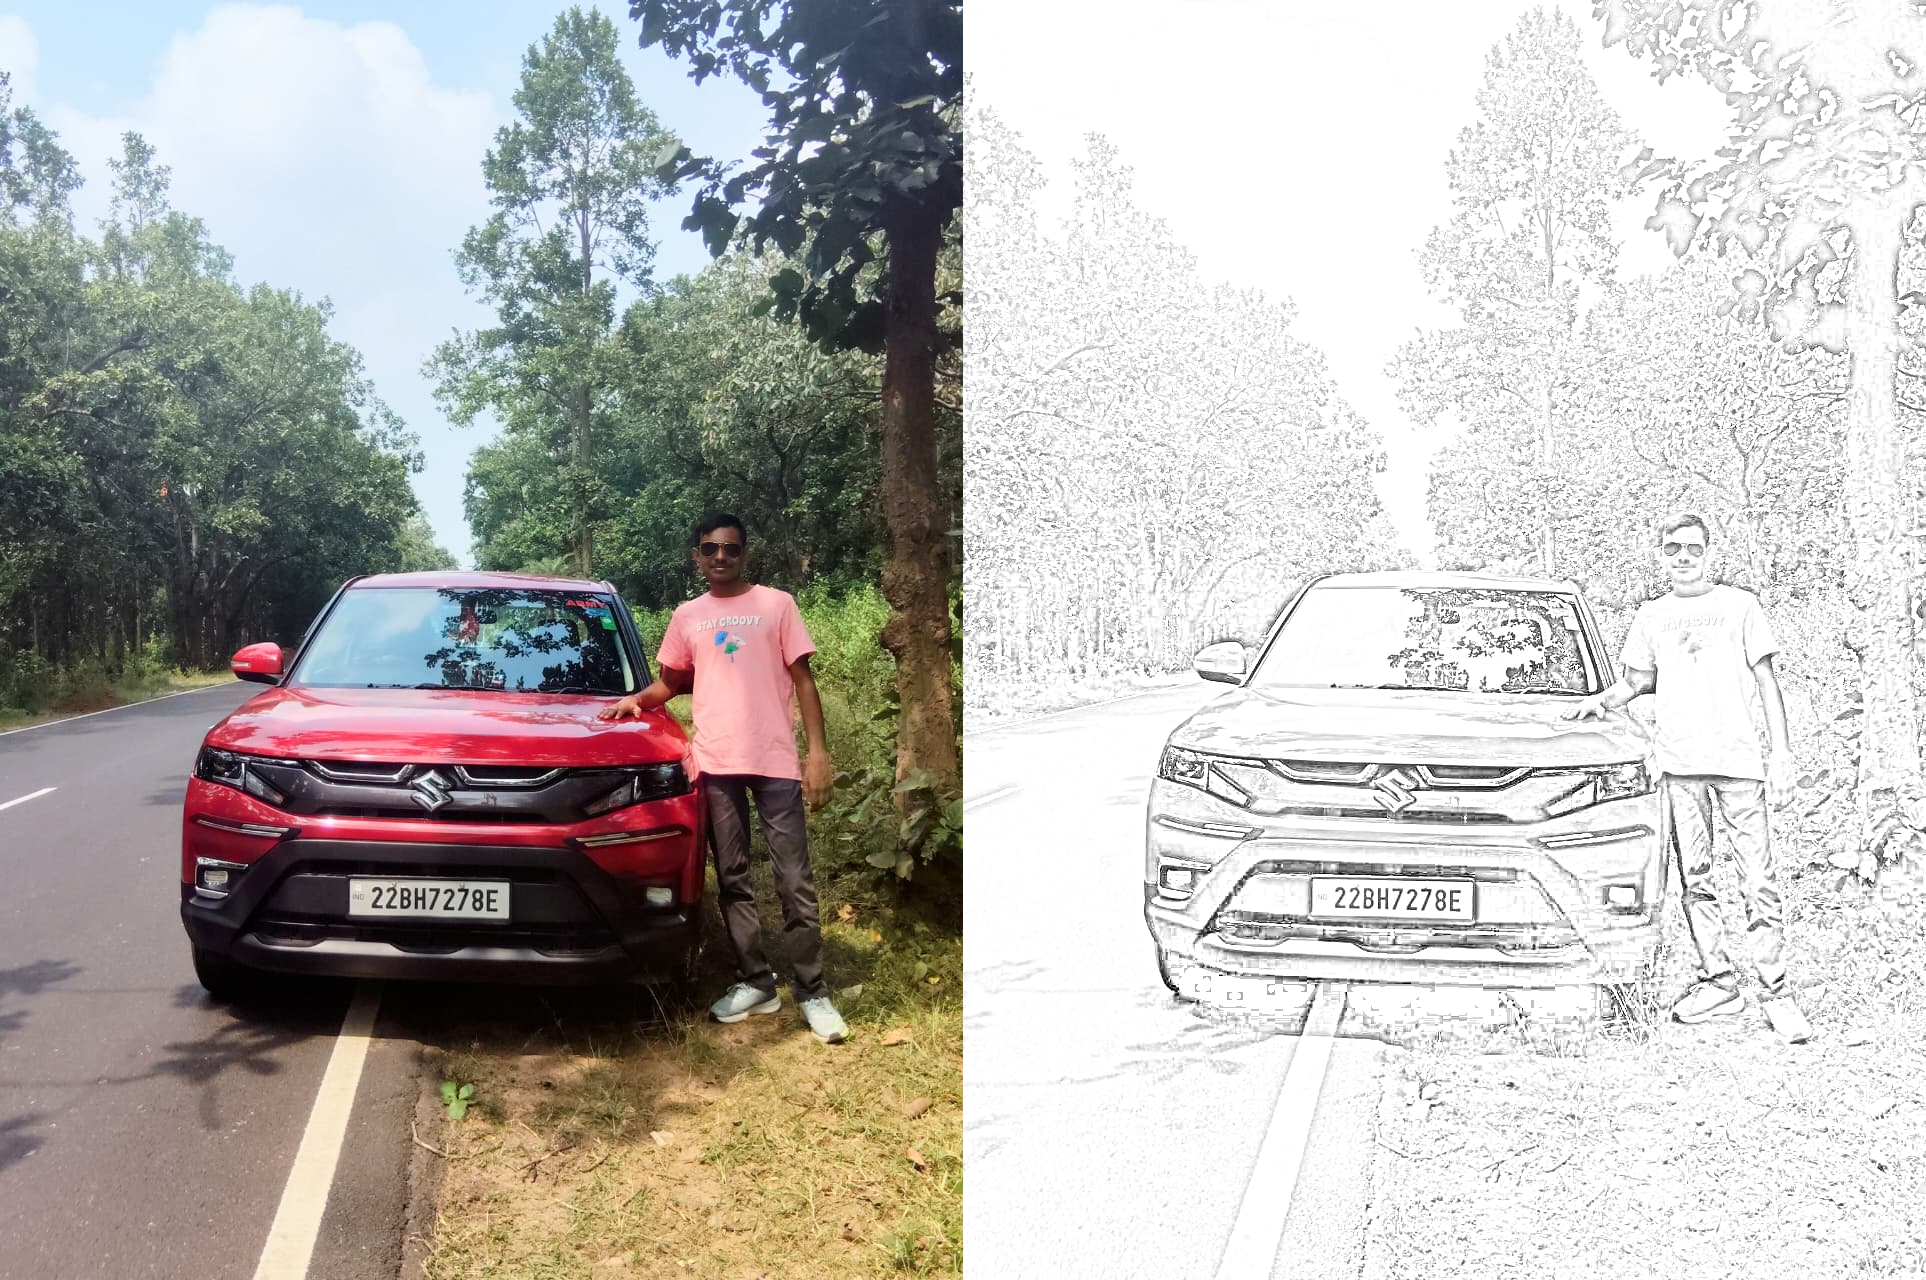

In [ ]:
#Convert a normal image to pencil sketch
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow


uploaded = files.upload()

for filename in uploaded.keys():
    image = cv2.imread(filename)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray_inv = 255 - gray

blur = cv2.GaussianBlur(gray_inv, (21, 21), 0)
blur_inv = 255 - blur

pencil_sketch = cv2.divide(gray, blur_inv, scale=256.0)

pencil_sketch_bgr = cv2.cvtColor(pencil_sketch, cv2.COLOR_GRAY2BGR)

height = min(image.shape[0], pencil_sketch_bgr.shape[0])
image_resized = cv2.resize(image, (int(image.shape[1] * height / image.shape[0]), height))
sketch_resized = cv2.resize(pencil_sketch_bgr, (int(pencil_sketch_bgr.shape[1] * height / pencil_sketch_bgr.shape[0]), height))

side_by_side = np.hstack((image_resized, sketch_resized))

cv2_imshow(side_by_side)


   .  

 **TASK-2(Normal Image to Pencil Sketch without using OpenCV)**


Please upload the image file you want to convert (e.g., your image_833e64.jpg).


Saving WhatsApp Image 2025-10-22 at 17.22.11_366ebc35.jpg to WhatsApp Image 2025-10-22 at 17.22.11_366ebc35 (14).jpg
Successfully loaded image: WhatsApp Image 2025-10-22 at 17.22.11_366ebc35 (14).jpg with size (963, 1280)

--- Generating Side-by-Side Output ---


/tmp/ipython-input-431055393.py:59: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  final_sketch = Image.fromarray(sketch_array.astype(np.uint8), 'L')


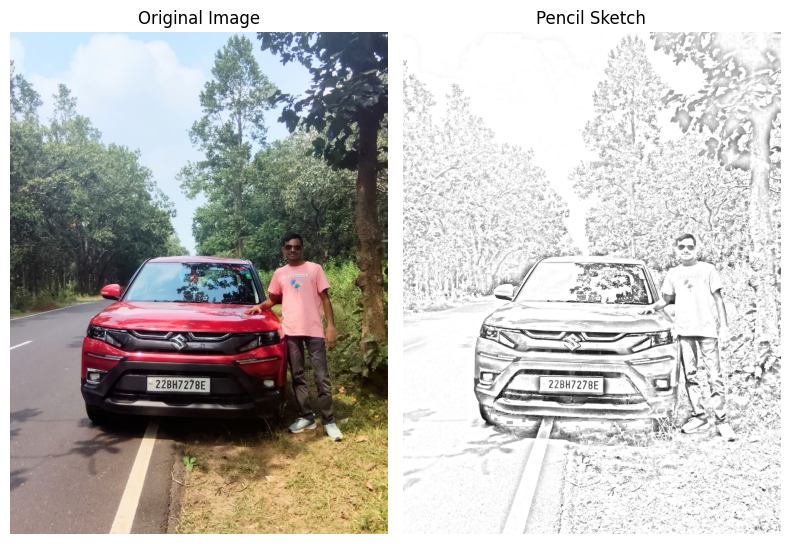

In [ ]:
#Convert a normal image to pencil sketch without using OpenCV
import numpy as np
from PIL import Image, ImageFilter
from google.colab import files
from io import BytesIO
import matplotlib.pyplot as plt

def create_sidebyside_sketch():
    """
    Uploads an image, converts it to a pencil sketch, and displays
    the original and the sketch side-by-side using Matplotlib.
    """
    print("Please upload the image file you want to convert (e.g., your image_833e64.jpg).")

    try:
        uploaded = files.upload()
        if not uploaded:
            print("No file uploaded. Exiting.")
            return

        file_name = next(iter(uploaded))
        img_bytes = uploaded[file_name]
    except Exception as e:
        print(f"An error occurred during file upload: {e}")
        return

    try:

        original_img = Image.open(BytesIO(img_bytes)).convert("RGB")
        print(f"Successfully loaded image: {file_name} with size {original_img.size}")




        grayscale_img = original_img.convert("L")


        inverted_img = Image.eval(grayscale_img, lambda x: 255 - x)

        blur_radius = 8
        blurred_img = inverted_img.filter(ImageFilter.GaussianBlur(radius=blur_radius))

        gs_array = np.array(grayscale_img).astype(float)
        blur_array = np.array(blurred_img).astype(float)

        blend_denom = 255 - blur_array
        blend_denom[blend_denom == 0] = 1e-6
        sketch_array = (gs_array / blend_denom) * 255
        sketch_array = np.clip(sketch_array, 0, 255)

        final_sketch = Image.fromarray(sketch_array.astype(np.uint8), 'L')



        print("\n--- Generating Side-by-Side Output ---")


        plt.figure(figsize=(8, 8))


        plt.subplot(1, 2, 1)
        plt.imshow(original_img)
        plt.title('Original Image')
        plt.axis('off')


        plt.subplot(1, 2, 2)
        plt.imshow(final_sketch, cmap='gray')
        plt.title('Pencil Sketch')
        plt.axis('off')


        plt.tight_layout()
        plt.show()



    except Exception as e:
        print(f"An error occurred during image processing: {e}")
        plt.close()

create_sidebyside_sketch()

.




**TASK-3(Convert Image to Basic Oil Paint and Realistic Brush Stroke)**

✨ Please click 'Choose Files' to upload an image from your device (e.g., .jpg, .png).


Saving Screenshot-149.png to Screenshot-149.png
✅ Successfully loaded 'Screenshot-149.png'.

🖥️ Using device: cuda
⏳ Loading Stable Diffusion Image-to-Image model...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


✅ Model loaded.

🎨 Running Stable Diffusion (Denoising Strength: 0.4)


  0%|          | 0/20 [00:00<?, ?it/s]

✅ Stable Diffusion completed.

🖼️ Displaying Results...


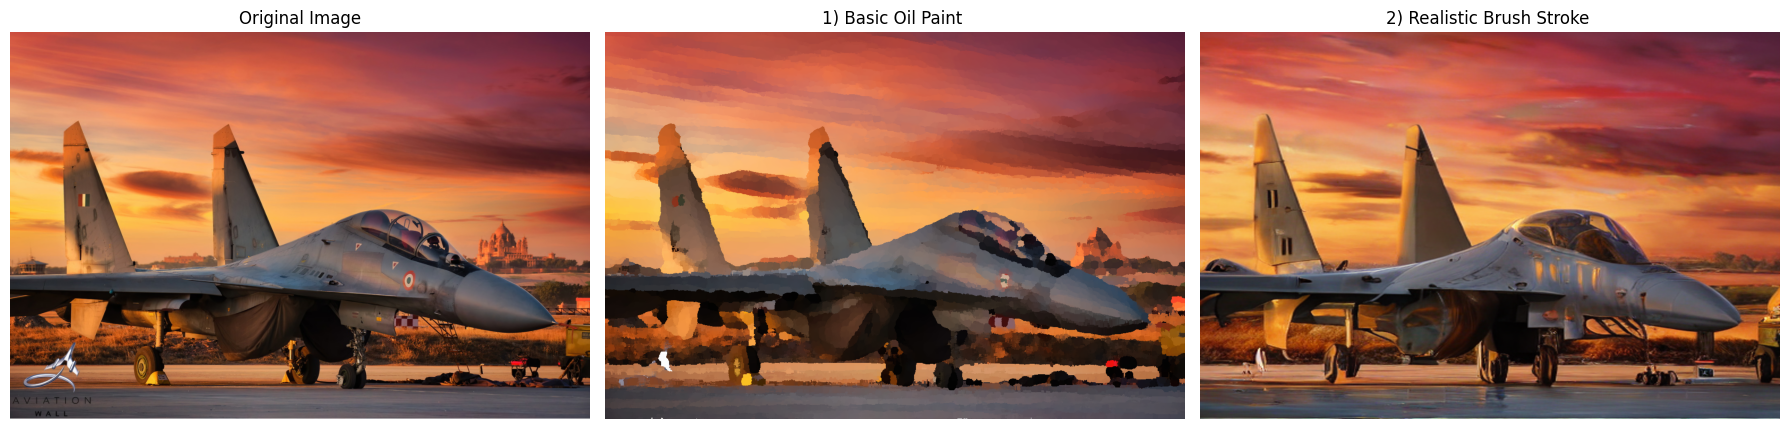

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
import io
import os

from diffusers import StableDiffusionImg2ImgPipeline
import torch



def upload_and_load_image():

    print("✨ Please click 'Choose Files' to upload an image from your device (e.g., .jpg, .png).")

    uploaded = files.upload()

    if not uploaded:
        print("❌ No file uploaded. Stopping process.")
        return None

    filename = next(iter(uploaded))
    img_bytes = uploaded[filename]
    pil_img = Image.open(io.BytesIO(img_bytes)).convert("RGB")

    print(f"✅ Successfully loaded '{filename}'.")
    return pil_img

def display_images(original, effect1, effect2):
    """Displays the original and processed images using Matplotlib."""
    plt.figure(figsize=(18, 6))


    original_display = original
    effect1_display = cv2.cvtColor(effect1, cv2.COLOR_BGR2RGB)
    effect2_display = effect2

    plt.subplot(1, 3, 1)
    plt.imshow(original_display)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(effect1_display)
    plt.title("1) Basic Oil Paint ")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(effect2_display)
    plt.title("2) Realistic Brush Stroke ")
    plt.axis('off')

    plt.tight_layout()
    plt.show()



def basic_oil_paint_opencv(pil_img):
    """Applies a simple oil painting filter using OpenCV's xphoto module."""
    cv_image = cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGB2BGR)
    oil_paint_basic = cv2.xphoto.oilPainting(cv_image, size=7, dynRatio=1)
    return oil_paint_basic



def realistic_oil_paint_sd(pil_img, prompt, negative_prompt, pipeline):
    denoising_strength = 0.4
    print(f"\n🎨 Running Stable Diffusion (Denoising Strength: {denoising_strength})")

    original_size = pil_img.size


    resized_img = pil_img.resize((512, 512))

    result_image = pipeline(
        prompt=prompt,
        image=resized_img,
        negative_prompt=negative_prompt,
        strength=denoising_strength,
        guidance_scale=7.5,
        num_inference_steps=50
    ).images[0]


    result_image = result_image.resize(original_size)

    print("✅ Stable Diffusion completed.")
    return result_image



original_pil_img = upload_and_load_image()

if original_pil_img is None:
    exit()

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"\n🖥️ Using device: {device}")

print("⏳ Loading Stable Diffusion Image-to-Image model...")
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
).to(device)
print("✅ Model loaded.")


oil_paint_basic_cv = basic_oil_paint_opencv(original_pil_img)

realistic_prompt = (
    "transform this image into a photorealistic oil painting, "
    "masterpiece, thick impasto brush strokes, detailed texture, "
    "highly detailed, professional quality, artstation, cinematic lighting"
)
negative_prompt = (
    "blur, lowres, blurry, worst quality, tiling, poorly drawn, out of frame, "
    "deformed, signature, watermark, cartoon, sketch, painting, illustration, "
    "flat colors, smooth, no texture"
)

oil_paint_realistic_sd = realistic_oil_paint_sd(
    original_pil_img,
    realistic_prompt,
    negative_prompt,
    pipe
)

print("\n🖼️ Displaying Results...")
display_images(original_pil_img, oil_paint_basic_cv, oil_paint_realistic_sd)


del pipe
if device == "cuda":
    torch.cuda.empty_cache()
